# first100 Stats

In this notebook we analyze some statistics from the first 100 muram2hanlert jobs executed on cheyenne.

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import sys
import os
import shutil

import muram
import hanlert
import muram2hanlert

In [2]:
%matplotlib inline

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
os.getpid() # for checking memory/CPU in terminal

232145

## Plot FALC Atmosphere

In [6]:
atmos = hanlert.read_atmos(os.path.expanduser('~/hanlert/Atmos/FALC93_70.atmos'))

In [7]:
# Print height resolution dX along the atmosphere
d_atmos = atmos['height'][0:-1] - atmos['height'][1:]
print(d_atmos)

[  1.5500488    1.4499512    1.3498535    2.1601562    2.1699219
   1.1000977    1.119873     1.130127     1.1298828    0.57006836
   0.52001953   0.52001953   0.5300293    0.5          0.4699707
   0.45996094   0.47998047   0.38989258   0.27001953   0.40014648
   0.31982422   0.73999023   1.1000977    9.          22.
  28.          30.          23.          12.          13.
  19.          26.          37.          65.          55.
  85.         105.          90.         105.          97.
 100.          98.         115.          85.          75.
  50.          50.          50.          50.          55.
  50.          40.          35.          35.          40.
  50.          50.          50.          50.          50.
  50.          50.          50.          50.          20.
  20.          20.          20.          20.        ]


Text(0, 0.5, 'Temperature [K]')

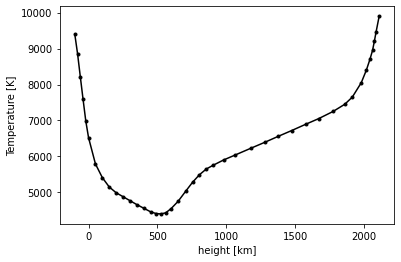

In [8]:
sel = atmos['T'] < 10000

fig, ax = plt.subplots()
ax.plot(atmos['height'][sel], atmos['T'][sel], 'k.-')
ax.set_xlabel('height [km]')
ax.set_ylabel('Temperature [K]')

## Plot MURaM atmosphere

In [9]:
dir2D = "/glade/p/hao/radmhd/rempel/Swirls/dyn_25x8Mm_16_pdmp_1_ext_zxy_pdm/2D"
dir3D = "/glade/p/hao/radmhd/rempel/Swirls/dyn_25x8Mm_16_pdmp_1_ext_zxy_pdm/3D"

In [10]:
iteration = 12000
snap = muram.MuramSnap(dir3D, iteration)

In [11]:
snap.available

['rho',
 'vx',
 'vy',
 'vz',
 'eint',
 'Bx',
 'By',
 'Bz',
 'T',
 'P',
 'Q',
 'tau',
 'Qres',
 'Qvis']

In [12]:
col = snap.column(0, 0)

Text(0, 0.5, 'Temperature [K]')

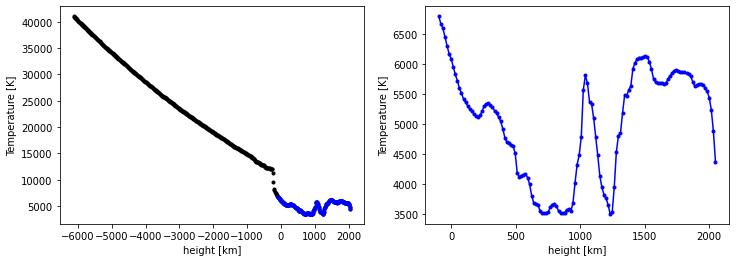

In [13]:
# Plot the whole atmosphere, highlighted the part sent to hanleRT (height > -100 km)
tau1_ix = (np.abs(col.tau - 1.0)).argmin()
height = (col.X - col.X[tau1_ix]) / 1e5 # km
sel = height >= -100.
        
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(height, col.T, 'k.')
ax1.plot(height[sel], col.T[sel], 'b.')
ax1.set_xlabel('height [km]')
ax1.set_ylabel('Temperature [K]')

ax2.plot(height[sel], col.T[sel], 'b.-')
ax2.set_xlabel('height [km]')
ax2.set_ylabel('Temperature [K]')

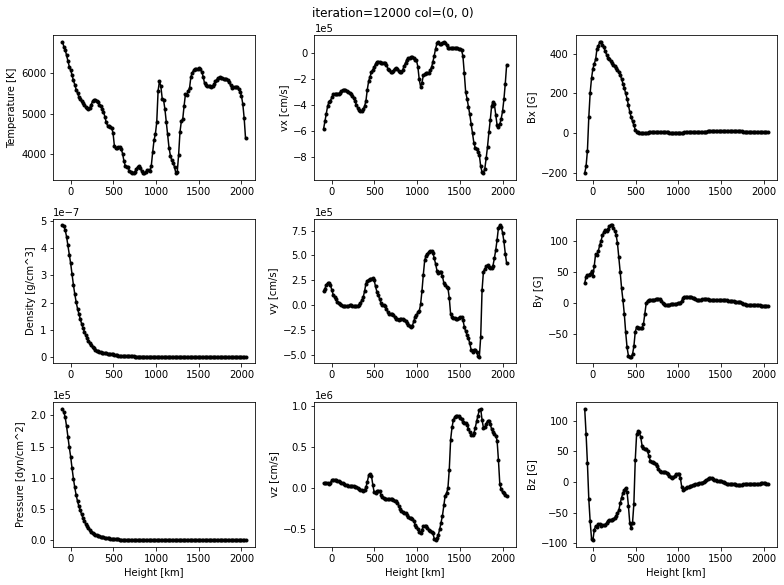

In [28]:
# Plot all the atmosphere variables that matter for RT
# Note: actually vy, vz don't matter
muram2hanlert.plot_atmos(col, save=True)

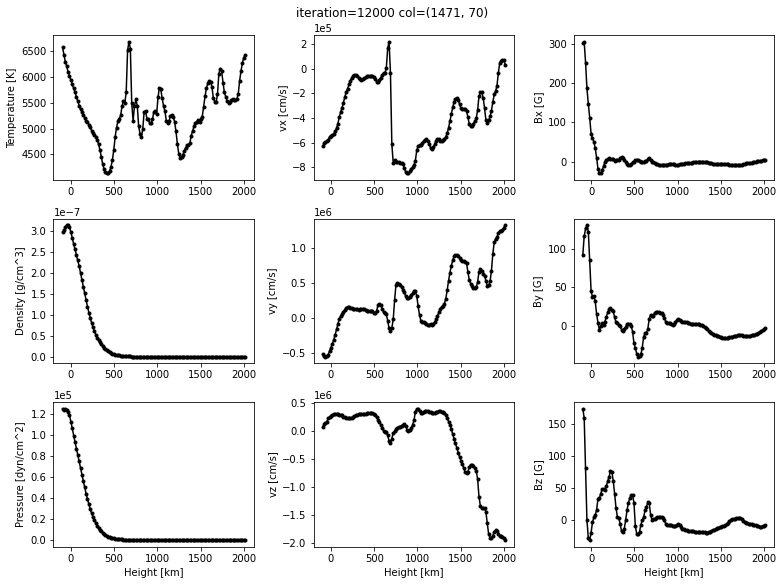

In [15]:
# A routine I wrote to explore the variability in atmospheres
# Just keep re-executing and have a look
muram2hanlert.plot_random_col(snap)

## Analyze First 100 Jobs

In [16]:
jobroot = os.path.expanduser("~/work/muram2hanlert")
jobname = 'first100'

In [17]:
muram2hanlert.job_status(jobroot, jobname, iteration, 0, 0)

('OK', 2091)

In [18]:
run_status = muram2hanlert.run_status(jobroot, jobname)

In [19]:
def T_mean(y, z):
    col = snap.column(y, z)
    tau1_ix = (np.abs(col.tau - 1.0)).argmin()
    height = (col.X - col.X[tau1_ix]) / 1e5 # km
    sel = height >= -100.
    return np.mean(col.T[sel])

T_mean(0, 0)

5021.4214

In [20]:
t_OK = []
p_OK = []
T_OK = []
for (y, z), (status, t) in run_status[iteration].items():
    if status == "OK":
        t_OK.append(t)
        p_OK.append((y, z))
        T_OK.append(T_mean(y, z))
    else:
        print("Job at", (y, z), "has status", status, "in", t)
t_OK = np.array(t_OK)
p_OK = np.array(p_OK)
T_OK = np.array(T_OK)
ix_sort = np.argsort(t_OK)
t_OK = t_OK[ix_sort]
p_OK = p_OK[ix_sort]
T_OK = T_OK[ix_sort]
N_OK = t_OK.size
print(N_OK, "jobs finished OK")

Job at (12, 12) has status FAIL in -3520755.4343163967
Job at (12, 16) has status FAIL in -3520763.4735753536
Job at (12, 24) has status FAIL in 2431
Job at (16, 32) has status FAIL in -3520768.355402231
Job at (20, 0) has status FAIL in -3520767.2356534004
Job at (20, 4) has status FAIL in -3520767.1228826046
Job at (20, 12) has status FAIL in -3520758.0836951733
Job at (20, 28) has status FAIL in -3520747.165512085
Job at (20, 32) has status FAIL in -3520760.797223568
Job at (20, 36) has status FAIL in -3520767.990185261
Job at (24, 4) has status FAIL in -3520767.5666229725
Job at (24, 36) has status FAIL in -3520748.611162901
Job at (28, 0) has status FAIL in -3520750.466571331
Job at (28, 12) has status FAIL in 5781
Job at (32, 16) has status FAIL in -3520762.422384262
Job at (32, 32) has status FAIL in 1750
Job at (32, 36) has status FAIL in -3520755.5968077183
Job at (36, 8) has status FAIL in -3520756.906473398
82 jobs finished OK


median time: 29.408 minutes


Text(0.5, 1.0, 'Time of Completed Jobs')

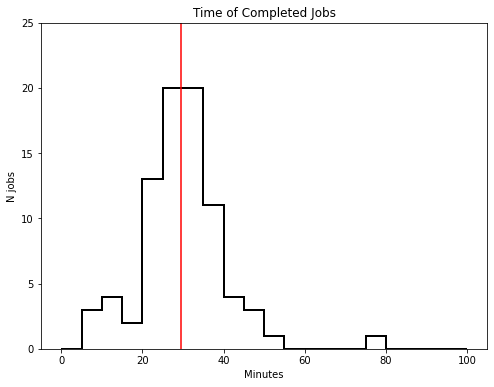

In [21]:
t_OK_med = np.median(t_OK / 60)
print(f"median time: {t_OK_med:0.3f} minutes")
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(t_OK / 60., bins=np.arange(0, 101, 5), histtype='step', color='k', lw=2)
ax.axvline(t_OK_med, c='r')
ax.set_yticks(np.arange(0, 25+1, 5))
ax.set_xlabel("Minutes")
ax.set_ylabel("N jobs")
ax.set_title("Time of Completed Jobs")

In [22]:
print("Columns sorted by execution time:")
for ix in range(len(t_OK)):
    print(f"{ix+1:2d} t={t_OK[ix]/60:0.1f} min, p={p_OK[ix]} T_mean={T_OK[ix]:0.1f}")

Columns sorted by execution time:
 1 t=7.5 min, p=[36 16] T_mean=4694.4
 2 t=8.6 min, p=[24  0] T_mean=5040.3
 3 t=9.6 min, p=[20  8] T_mean=4646.4
 4 t=10.7 min, p=[32 24] T_mean=4786.0
 5 t=10.8 min, p=[ 4 36] T_mean=4686.3
 6 t=12.1 min, p=[8 0] T_mean=4824.3
 7 t=12.2 min, p=[28  4] T_mean=4921.2
 8 t=19.6 min, p=[20 24] T_mean=4491.8
 9 t=19.7 min, p=[32 20] T_mean=4670.7
10 t=20.1 min, p=[36 28] T_mean=4941.8
11 t=20.2 min, p=[24  8] T_mean=4700.9
12 t=20.5 min, p=[16 16] T_mean=4460.8
13 t=21.6 min, p=[28 20] T_mean=4569.4
14 t=21.6 min, p=[28 24] T_mean=4704.3
15 t=22.4 min, p=[16  4] T_mean=4695.6
16 t=22.6 min, p=[32  8] T_mean=4776.0
17 t=23.0 min, p=[36 12] T_mean=4734.8
18 t=24.1 min, p=[16 28] T_mean=4591.4
19 t=24.8 min, p=[20 16] T_mean=4481.6
20 t=24.8 min, p=[4 0] T_mean=4869.4
21 t=24.9 min, p=[12 20] T_mean=4555.8
22 t=24.9 min, p=[24 24] T_mean=4619.8
23 t=25.1 min, p=[32 12] T_mean=4624.6
24 t=25.2 min, p=[28 16] T_mean=4546.2
25 t=25.2 min, p=[36  4] T_mean=5155.

Text(0, 0.5, 'execution time')

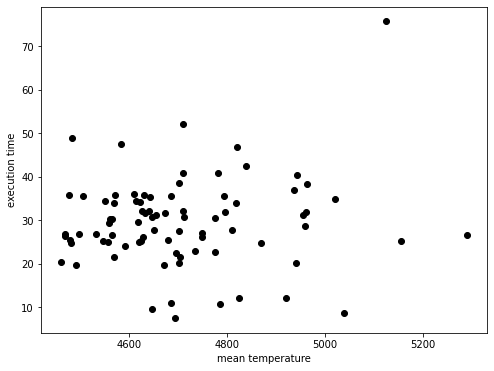

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(T_OK, t_OK/60, 'ko')
ax.set_xlabel("mean temperature")
ax.set_ylabel("execution time")

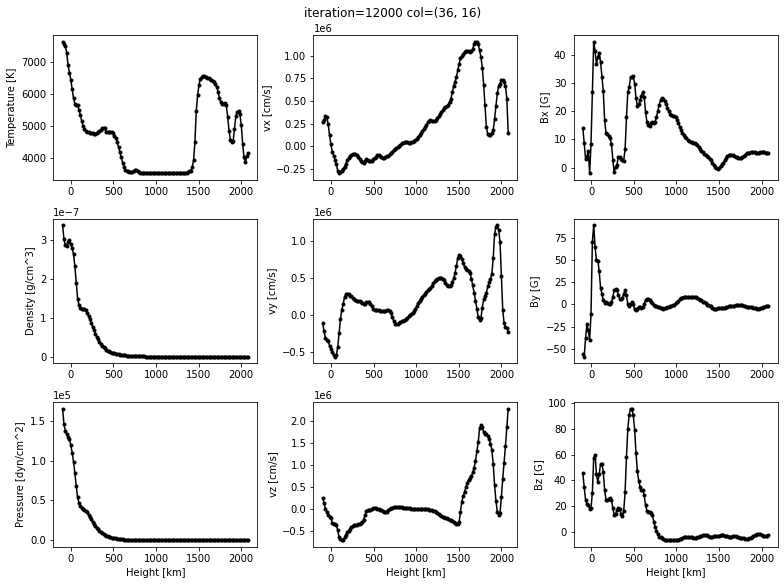

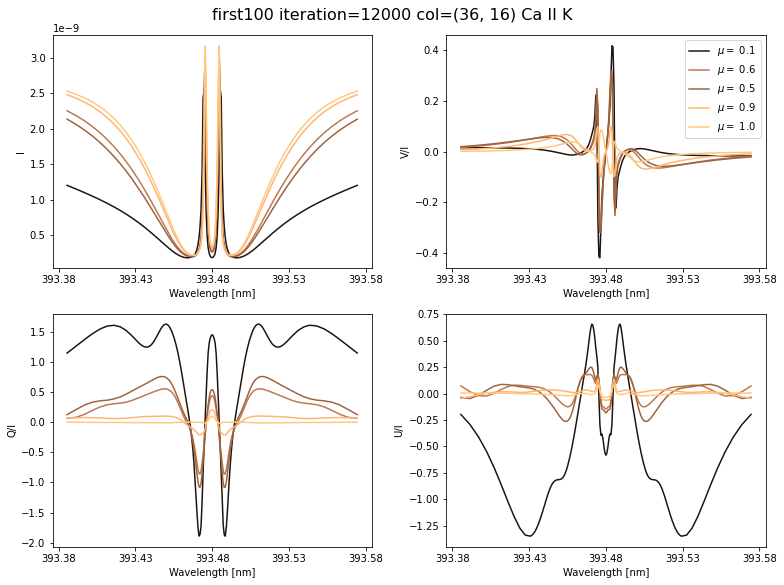

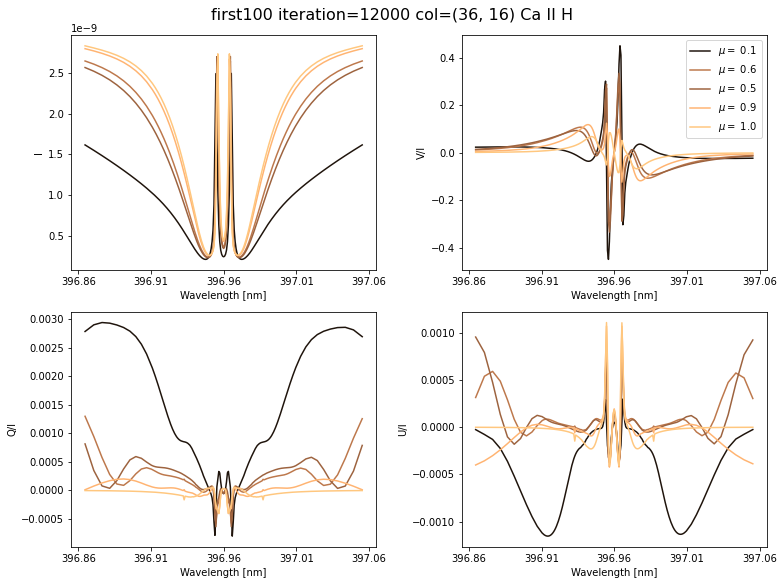

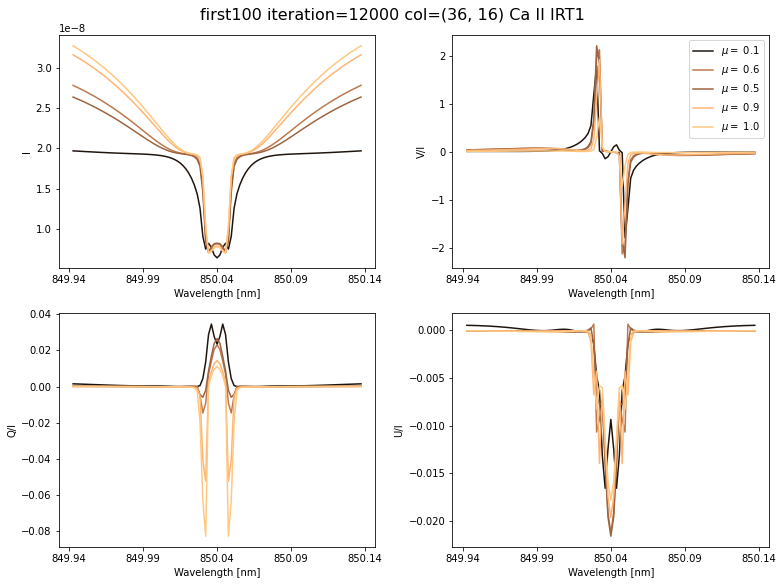

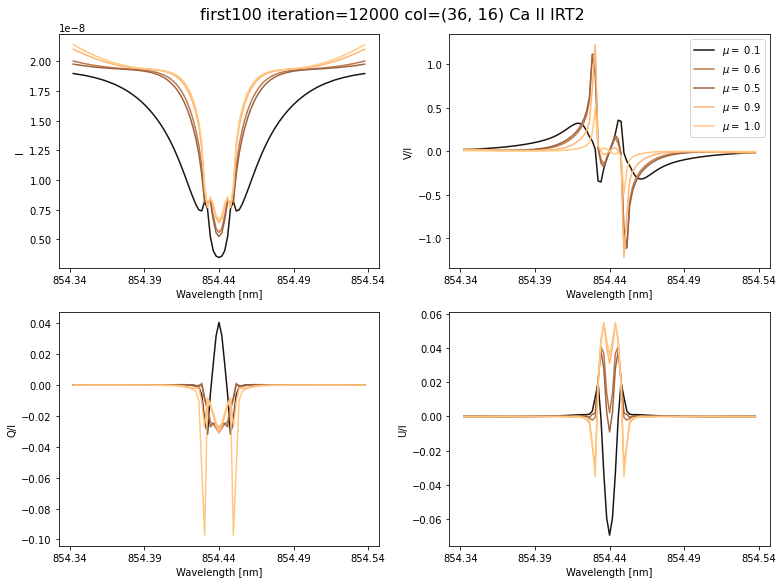

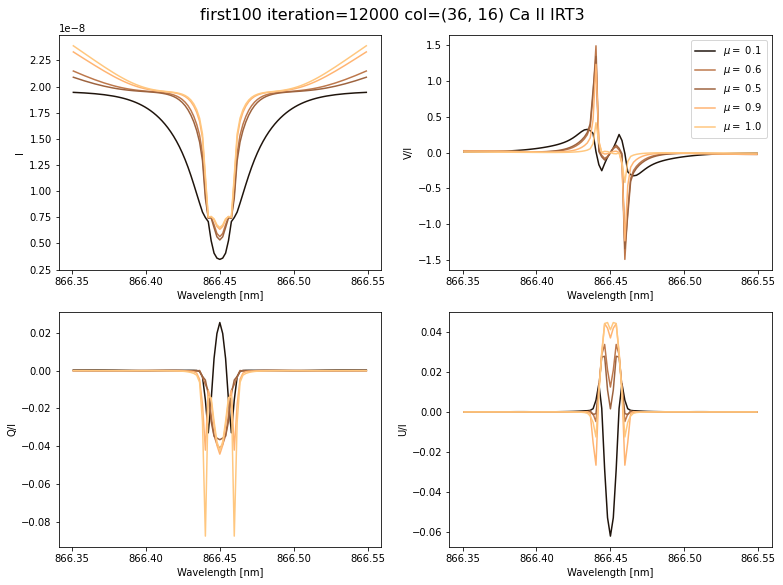

In [24]:
# Plot fastest column
muram2hanlert.plot_col(snap, *p_OK[0])
muram2hanlert.plot_CaII(jobroot, jobname, iteration, *p_OK[0])

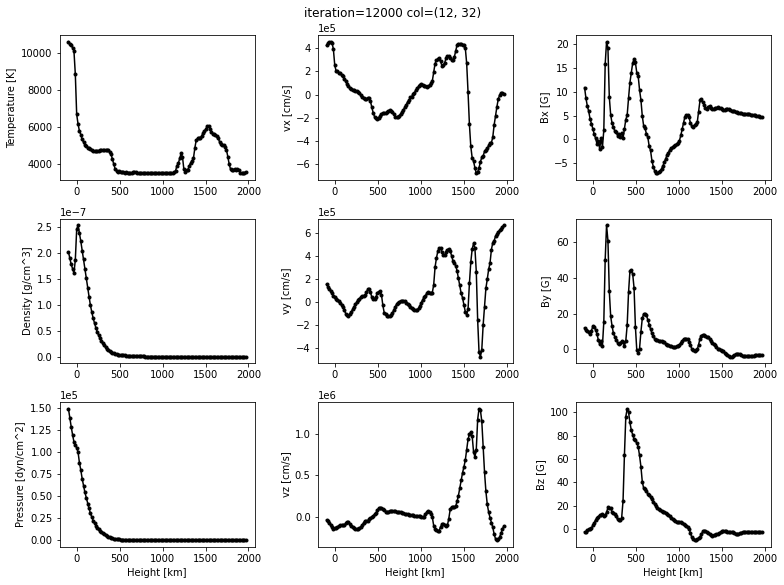

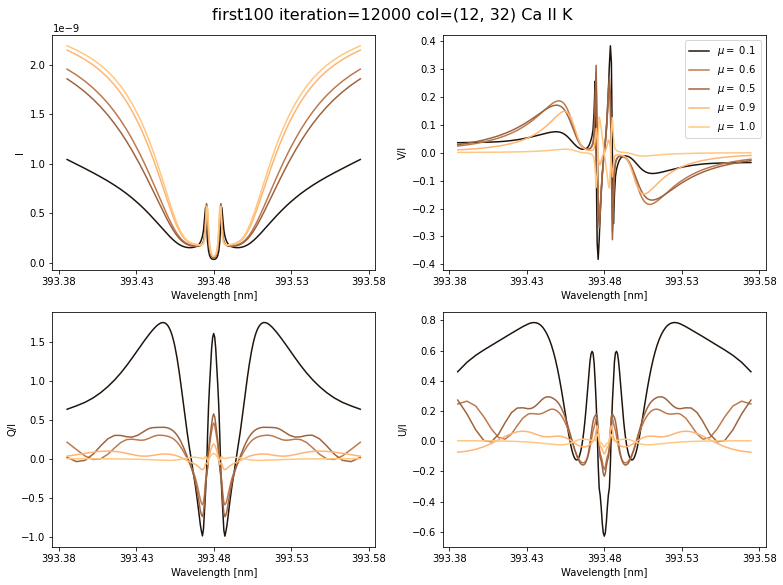

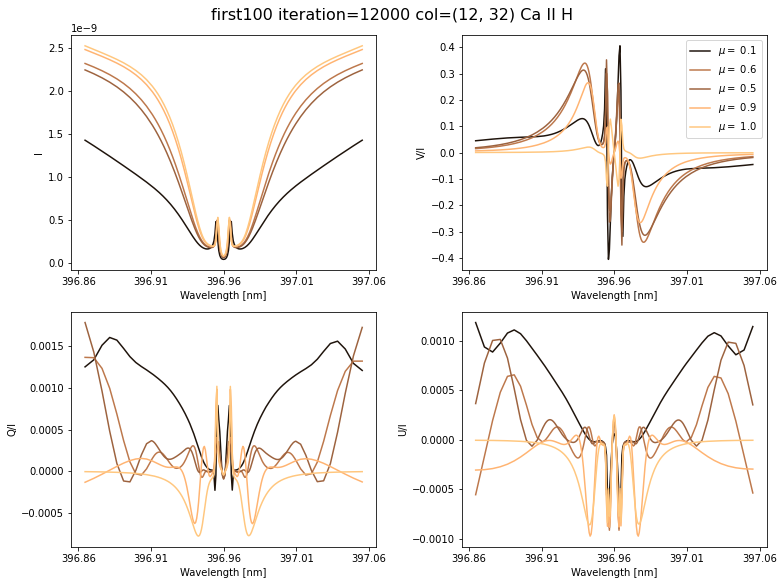

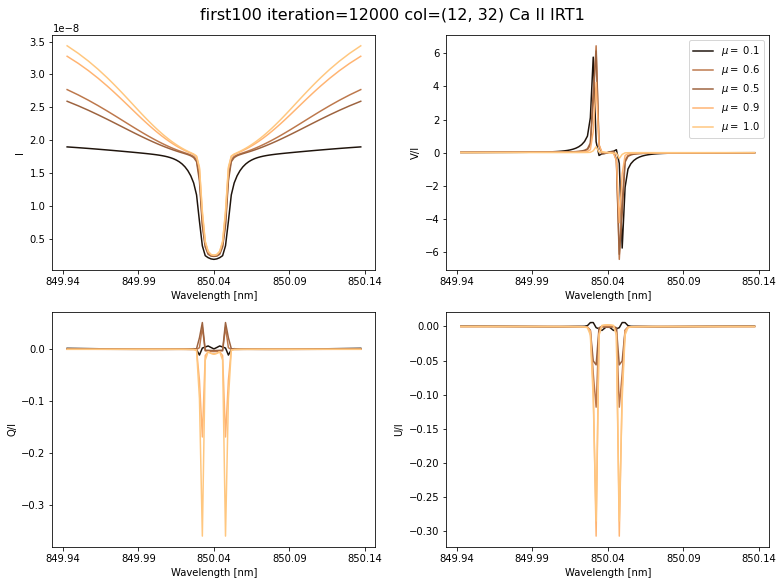

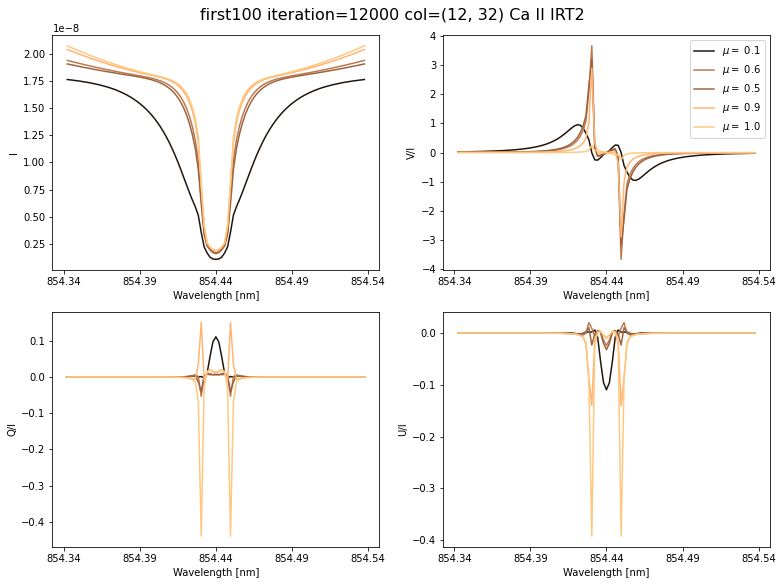

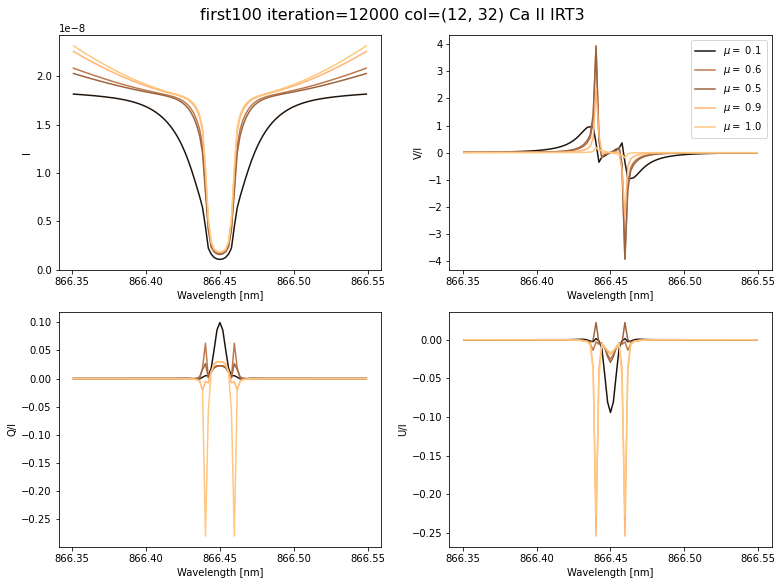

In [25]:
# middle column
muram2hanlert.plot_col(snap, *p_OK[42])
muram2hanlert.plot_CaII(jobroot, jobname, iteration, *p_OK[42])

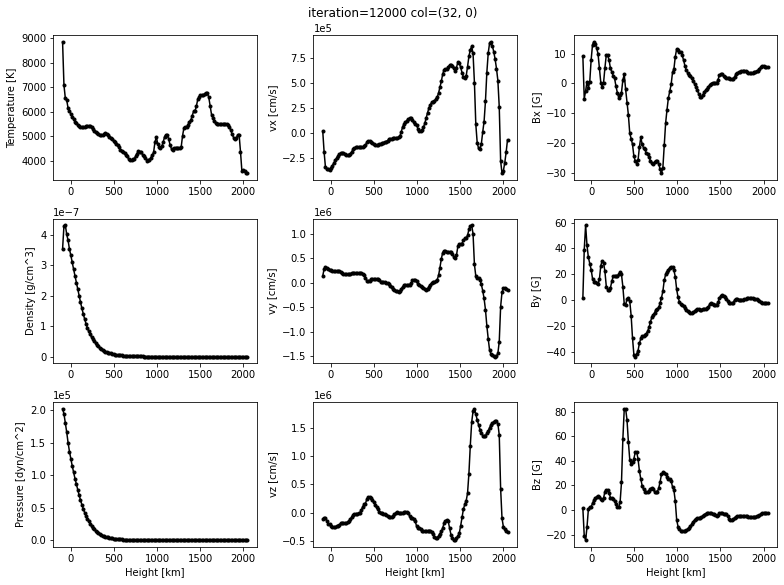

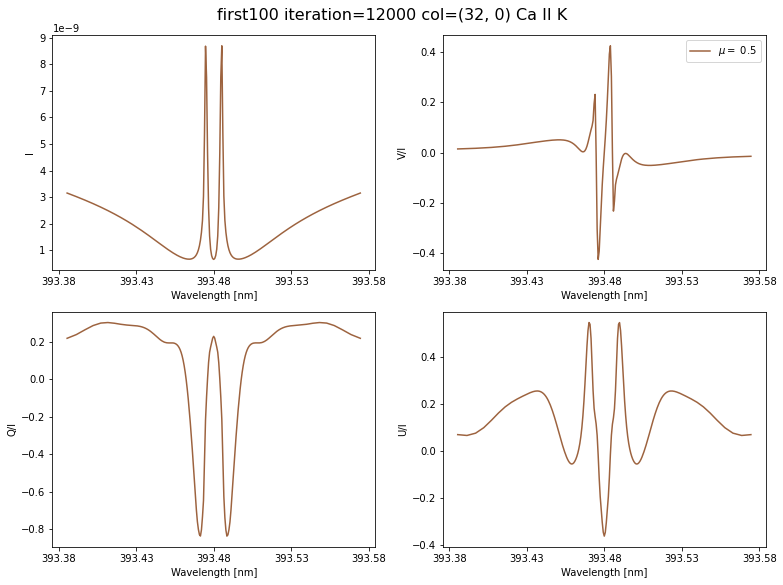

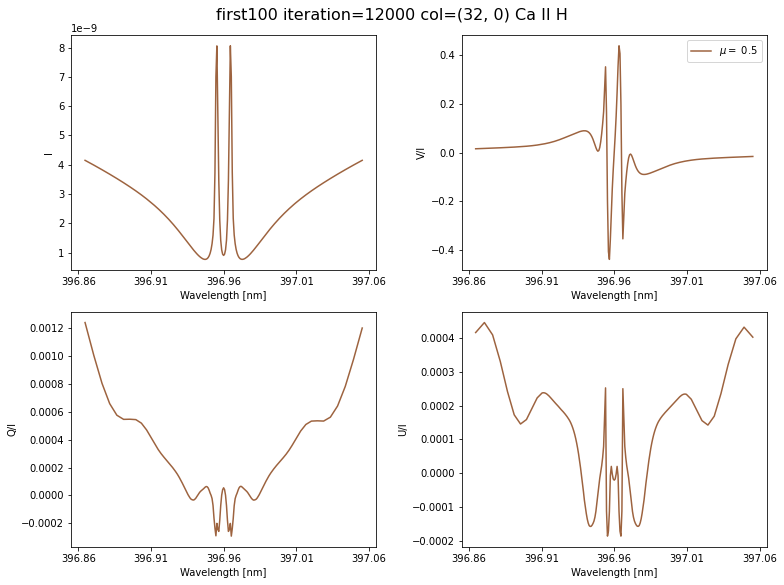

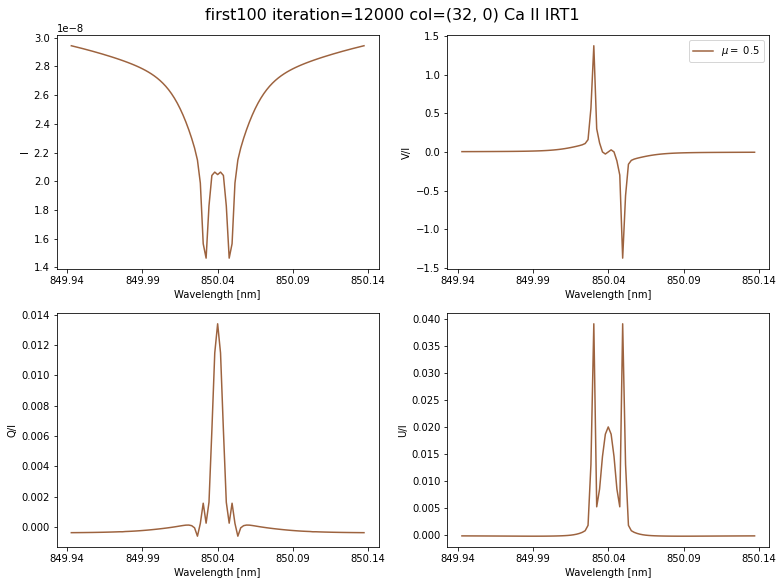

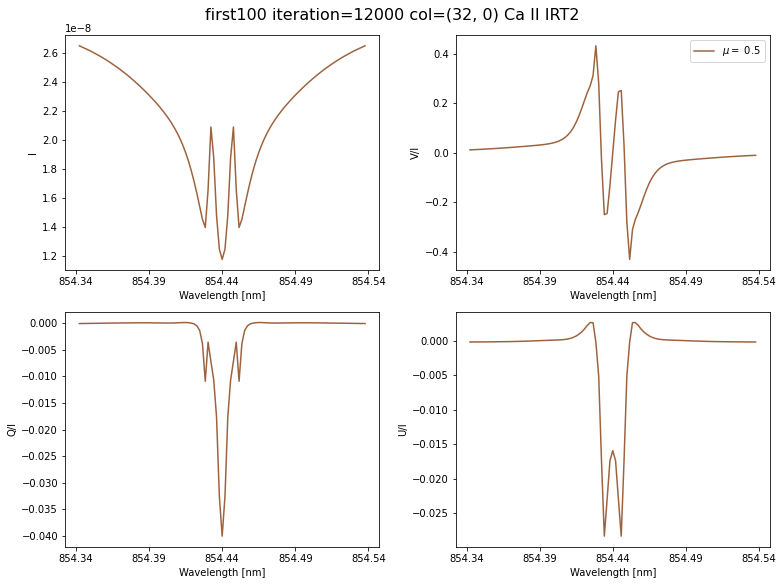

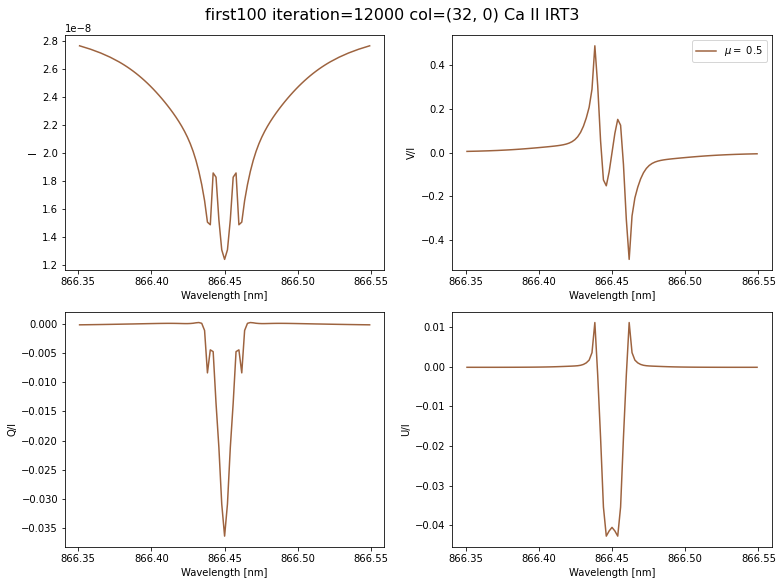

In [26]:
# slowest column
muram2hanlert.plot_col(snap, *p_OK[-1], save=True)
muram2hanlert.plot_CaII(jobroot, jobname, iteration, *p_OK[-1], mu=0.5, save=True)

**NOTES from first100 analysis**

Reminder: cases had no vmacro

 * Fasted=(36, 16) 7.5 min, middle=(0, 36) 29.5 min, slowest=(32,0) 75.7 min
 * No clear differences in atmospheric profiles
 * No clear trend in mean temperature
 * For slowest case, very large Ca II K core intensity for slowest case

**TODO**: Remember to update MuramCube, MuramSlice to multiply Bx, By, Bz by $\sqrt{4 \pi}$

**NOTES from first test**

 * Failed when vmacro was set; gave warning about Ca shift: need larger wavelength grid?
 * Failed when vmacro = 0 and density_type='rho'; gave ERROR files about negative populations
   * Same error when density_type='pgas'
 * Failed when order of atmosphere was bottom to top
   * **Reversing the order makes the test successful!**
   * TODO: make writer ensure correct order
 * TODO: try putting vmacro back in...
 * Performance worse than FALC case, is it due to:
   * Non-uniform B field?
   * Increased number of depths in atmosphere?
 * Why does a Ndep=45 atmosphere compute so fast compared to Ndep=68 or Ndep=34?